In [1]:
import os
import pandas as pd
import numpy as np
import cv2  # conda install -c conda-forge opencv
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (6, 3)
plt.rcParams['axes.grid'] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["font.size"] = 12
plt.rcParams["savefig.bbox"] = "tight"
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
stats_path = "./data/results/stats/feature_extraction/"
csv_filenames = sorted([f for f in os.listdir(stats_path) if f.endswith(".csv")])
l=list()
dfs = []
for nth, fn in enumerate(csv_filenames):
    df_tmp = pd.read_csv(os.path.join(stats_path, fn)).reset_index(drop=True)#.dropna(subset="centroid_x")
    perimeter = df_tmp.perimeter.to_numpy()
    df_tmp["peri_zscore"] = (perimeter - np.mean(perimeter)) / np.std(perimeter)
    df_tmp["exp"] = int(nth)
    l.append(len(df_tmp))
    dfs.append(df_tmp)

del df_tmp
print(len(dfs), sum(l))

20 14508


In [3]:
SAVE_DF = False
df = pd.concat(dfs, ignore_index=True)
df.to_csv(f"./data/results/egocentric_all_stats.csv", index=False) if SAVE_DF else None

In [4]:
LOAD_DF = True
df = pd.read_csv(f"./data/results/egocentric_all_stats.csv") if LOAD_DF else df
exp_names = df.groupby("exp")["img_fp"].first()
print(len(df), len(exp_names))

exp_names = [en.split("/")[3] for en in exp_names]
exp_names

14508 20


['2024_0201_152845_091_10sec',
 '2024_0201_152845_091_subclip_7sec_ts98-te105_cropped',
 '2024_0216_094236_090_11sec_cropped',
 '2024_0216_161747_055_20sec_cropped',
 '2024_0311_152452_018_trimmed_15sec_ts0-te15_cropped_700-2100-400-1800',
 '2024_0311_153344_021_trimmed_10sec_ts28-te38_cropped_1050-1800-800-2000',
 '2024_0312_194950_050_trimmed',
 '2024_0312_200031_053_trimmed_15sec_ts74-te89_cropped_250-1250-0-1100',
 '2024_0322_170346_054_trimmed',
 '2024_0324_204541_027_trimmed',
 '2024_0328_094441_053_trimmed',
 '2024_0330_120233_097_trimmed',
 '2024_0330_120947_101_trimmed',
 '2024_0330_121516_105_trimmed',
 '2024_0330_122058_107_trimmed_ts6-te120',
 '2024_0331_091926_007_trimmed',
 '2024_0408_074310_021',
 '2024_0415_084257_008_trimmed',
 '2024_0512_085355_018_trimmed',
 '2024_0512_091209_023_trimmed']

In [8]:
df

,centroid_x,centroid_y,area,min_area,extent,perimeter,aspect_ratio,orientation,centroid_dist,mask_fp,img_fp,peri_zscore,exp,indices,segmask_fails
0,377.0,300.0,24380.5,65520.0,314.0,846.933108,0.660317,147.415833,NaN,../data/seg_masks/2024_0201_152845_091_10sec_m...,../data/images/2024_0201_152845_091_10sec/fram...,-1.092376,0,NaN,NaN
1,377.0,311.0,25070.5,68340.0,339.0,873.560527,0.591176,151.259476,11.000000,../data/seg_masks/2024_0201_152845_091_10sec_m...,../data/images/2024_0201_152845_091_10sec/fram...,-0.994630,0,NaN,NaN
2,372.0,328.0,25980.0,70688.0,375.0,929.518895,0.500000,155.096329,17.720045,../data/seg_masks/2024_0201_152845_091_10sec_m...,../data/images/2024_0201_152845_091_10sec/fram...,-0.789214,0,NaN,NaN
3,368.0,344.0,26381.5,71779.0,400.0,965.276253,0.446384,157.793167,16.492423,../data/seg_masks/2024_0201_152845_091_10sec_m...,../data/images/2024_0201_152845_091_10sec/fram...,-0.657953,0,NaN,NaN
4,373.0,356.0,27363.5,79130.0,409.0,997.560524,0.470732,157.030518,13.000000,../data/seg_masks/2024_0201_152845_091_10sec_m...,../data/images/2024_0201_152845_091_10sec/fram...,-0.539442,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14503,1006.0,580.0,13259.5,55614.0,298.0,785.134120,0.622074,26.970743,1.414214,../data/seg_masks/2024_0512_091209_023_trimmed...,../data/images/2024_0512_091209_023_trimmed/fr...,0.822703,19,NaN,NaN
14504,1006.0,579.0,13332.5,55913.0,298.0,787.134115,0.625418,27.105341,0.000000,../data/seg_masks/2024_0512_091209_023_trimmed...,../data/images/2024_0512_091209_023_trimmed/fr...,0.837069,19,NaN,NaN
14505,1005.0,581.0,13173.0,56287.0,300.0,783.862039,0.621262,27.474932,1.000000,../data/seg_masks/2024_0512_091209_023_trimmed...,../data/images/2024_0512_091209_023_trimmed/fr...,0.813566,19,NaN,NaN
14506,1005.0,583.0,13132.5,56100.0,299.0,780.104679,0.623333,27.383839,0.000000,../data/seg_masks/2024_0512_091209_023_trimmed...,../data/images/2024_0512_091209_023_trimmed/fr...,0.786578,19,NaN,NaN


In [7]:
img_fps = df.groupby("exp")["img_fp"].last()
img_int = [int(os.path.splitext(os.path.basename(ifp))[0].split("_")[-1]) for ifp in img_fps]
img_int

[314,
 166,
 329,
 479,
 359,
 235,
 987,
 359,
 1819,
 933,
 1706,
 972,
 570,
 1737,
 5634,
 684,
 772,
 2105,
 1809,
 3300]

In [5]:
df

,centroid_x,centroid_y,area,min_area,extent,perimeter,aspect_ratio,orientation,centroid_dist,mask_fp,img_fp,peri_zscore,exp,indices,segmask_fails
0,377.0,300.0,24380.5,65520.0,314.0,846.933108,0.660317,147.415833,NaN,../data/seg_masks/2024_0201_152845_091_10sec_m...,../data/images/2024_0201_152845_091_10sec/fram...,-1.092376,0,NaN,NaN
1,377.0,311.0,25070.5,68340.0,339.0,873.560527,0.591176,151.259476,11.000000,../data/seg_masks/2024_0201_152845_091_10sec_m...,../data/images/2024_0201_152845_091_10sec/fram...,-0.994630,0,NaN,NaN
2,372.0,328.0,25980.0,70688.0,375.0,929.518895,0.500000,155.096329,17.720045,../data/seg_masks/2024_0201_152845_091_10sec_m...,../data/images/2024_0201_152845_091_10sec/fram...,-0.789214,0,NaN,NaN
3,368.0,344.0,26381.5,71779.0,400.0,965.276253,0.446384,157.793167,16.492423,../data/seg_masks/2024_0201_152845_091_10sec_m...,../data/images/2024_0201_152845_091_10sec/fram...,-0.657953,0,NaN,NaN
4,373.0,356.0,27363.5,79130.0,409.0,997.560524,0.470732,157.030518,13.000000,../data/seg_masks/2024_0201_152845_091_10sec_m...,../data/images/2024_0201_152845_091_10sec/fram...,-0.539442,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14503,1006.0,580.0,13259.5,55614.0,298.0,785.134120,0.622074,26.970743,1.414214,../data/seg_masks/2024_0512_091209_023_trimmed...,../data/images/2024_0512_091209_023_trimmed/fr...,0.822703,19,NaN,NaN
14504,1006.0,579.0,13332.5,55913.0,298.0,787.134115,0.625418,27.105341,0.000000,../data/seg_masks/2024_0512_091209_023_trimmed...,../data/images/2024_0512_091209_023_trimmed/fr...,0.837069,19,NaN,NaN
14505,1005.0,581.0,13173.0,56287.0,300.0,783.862039,0.621262,27.474932,1.000000,../data/seg_masks/2024_0512_091209_023_trimmed...,../data/images/2024_0512_091209_023_trimmed/fr...,0.813566,19,NaN,NaN
14506,1005.0,583.0,13132.5,56100.0,299.0,780.104679,0.623333,27.383839,0.000000,../data/seg_masks/2024_0512_091209_023_trimmed...,../data/images/2024_0512_091209_023_trimmed/fr...,0.786578,19,NaN,NaN


In [6]:
(24, 315, 1668, 1084)
(24, 168, 1530, 550)
(30, 330, 1920, 800)  # what here: mpp_fhd, fps60_factor
(24, 480, 1850, 850)
(24, 360, 1400, 1400)
(24, 240, 750, 1200)
(24, 994, 2880, 2160)
(24, 360, 1000, 1100)
(60, 1833, 1920, 1080)
(24, 944, 2880, 2160)
(60, 1722, 1920, 1080)
(60, 973, 1920, 1080)
(60, 576, 1920, 1080)
(60, 1746, 1920, 1080)

(60, many, 1920,1080)

(60, 685, 1920, 1080)
(60, 774, 1920, 1080)
(60, 2119, 1920, 1080)
(60, 1824, 1920, 1080)
(60, 3307, 1920, 1080)

NameError: name 'many' is not defined

In [17]:
mpp_fhd = 1.65  # microns_per_pixel
mpp_uhd = 2.5
fps24_factor = 1.25 
fps60_factor = 2

mpps = [mpp_uhd, mpp_uhd, mpp_fhd, mpp_uhd, mpp_uhd, mpp_uhd, mpp_uhd, mpp_uhd, mpp_fhd, mpp_uhd, mpp_fhd, mpp_fhd, mpp_fhd, mpp_fhd, mpp_fhd, mpp_fhd, mpp_fhd, mpp_fhd, mpp_fhd, mpp_fhd]
fpss = [fps24_factor, fps24_factor, fps60_factor, fps24_factor, fps24_factor, fps24_factor, fps24_factor, fps24_factor, fps60_factor, fps24_factor, fps60_factor, fps60_factor, fps60_factor, fps60_factor, fps60_factor, fps60_factor, fps60_factor, fps60_factor, fps60_factor, fps60_factor]
print(len(mpps), len(fpss))
#(signal / mpp) * fps
exp_values = df['exp'].unique()
mpp_map = dict(zip(exp_values, mpps))
fps_map = dict(zip(exp_values, fpss))

df['nperimeter'] = df.apply(lambda row: (row['perimeter'] / mpp_map[row['exp']]), axis=1)
df['ncentroid_dist'] = df.apply(lambda row: (row['centroid_dist'] / mpp_map[row['exp']]) * fps_map[row['exp']], axis=1)

SAVE_DF = False
df.to_csv(f"./data/results/egocentric_all_stats_normalized.csv", index=False) if SAVE_DF else None

20 20


In [18]:
df

,centroid_x,centroid_y,area,min_area,extent,perimeter,aspect_ratio,orientation,centroid_dist,mask_fp,img_fp,peri_zscore,exp,indices,segmask_fails,ncentroid_dist,nperimeter
0,377.0,300.0,24380.5,65520.0,314.0,846.933108,0.660317,147.415833,NaN,../data/seg_masks/2024_0201_152845_091_10sec_m...,../data/images/2024_0201_152845_091_10sec/fram...,-1.092376,0,NaN,NaN,NaN,338.773243
1,377.0,311.0,25070.5,68340.0,339.0,873.560527,0.591176,151.259476,11.000000,../data/seg_masks/2024_0201_152845_091_10sec_m...,../data/images/2024_0201_152845_091_10sec/fram...,-0.994630,0,NaN,NaN,5.500000,349.424211
2,372.0,328.0,25980.0,70688.0,375.0,929.518895,0.500000,155.096329,17.720045,../data/seg_masks/2024_0201_152845_091_10sec_m...,../data/images/2024_0201_152845_091_10sec/fram...,-0.789214,0,NaN,NaN,8.860023,371.807558
3,368.0,344.0,26381.5,71779.0,400.0,965.276253,0.446384,157.793167,16.492423,../data/seg_masks/2024_0201_152845_091_10sec_m...,../data/images/2024_0201_152845_091_10sec/fram...,-0.657953,0,NaN,NaN,8.246211,386.110501
4,373.0,356.0,27363.5,79130.0,409.0,997.560524,0.470732,157.030518,13.000000,../data/seg_masks/2024_0201_152845_091_10sec_m...,../data/images/2024_0201_152845_091_10sec/fram...,-0.539442,0,NaN,NaN,6.500000,399.024209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14503,1006.0,580.0,13259.5,55614.0,298.0,785.134120,0.622074,26.970743,1.414214,../data/seg_masks/2024_0512_091209_023_trimmed...,../data/images/2024_0512_091209_023_trimmed/fr...,0.822703,19,NaN,NaN,1.714198,475.838860
14504,1006.0,579.0,13332.5,55913.0,298.0,787.134115,0.625418,27.105341,0.000000,../data/seg_masks/2024_0512_091209_023_trimmed...,../data/images/2024_0512_091209_023_trimmed/fr...,0.837069,19,NaN,NaN,0.000000,477.050979
14505,1005.0,581.0,13173.0,56287.0,300.0,783.862039,0.621262,27.474932,1.000000,../data/seg_masks/2024_0512_091209_023_trimmed...,../data/images/2024_0512_091209_023_trimmed/fr...,0.813566,19,NaN,NaN,1.212121,475.067903
14506,1005.0,583.0,13132.5,56100.0,299.0,780.104679,0.623333,27.383839,0.000000,../data/seg_masks/2024_0512_091209_023_trimmed...,../data/images/2024_0512_091209_023_trimmed/fr...,0.786578,19,NaN,NaN,0.000000,472.790715


208.60054962562793


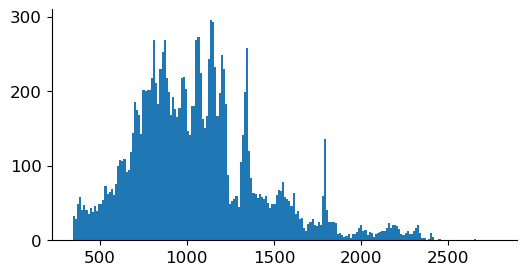

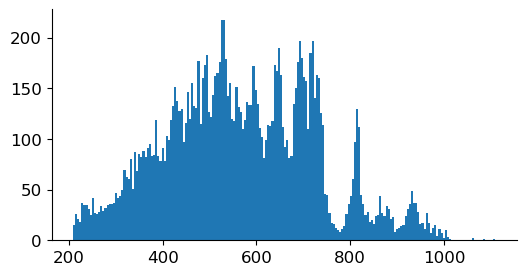

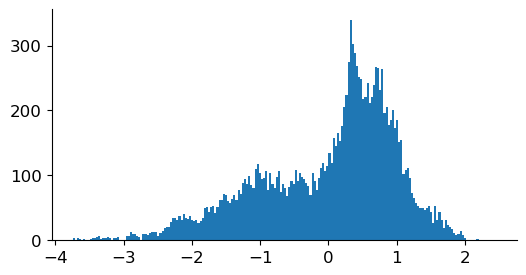

In [19]:
print(min(df.nperimeter))
plt.figure()
plt.hist(df.perimeter, bins=200);

plt.figure()
plt.hist(df.nperimeter, bins=200);

plt.figure()
plt.hist(df.peri_zscore, bins=200);

# plt.figure()
# plt.hist(df.centroid_dist, bins=np.arange(0,30,1));

(0.0, 30.0)

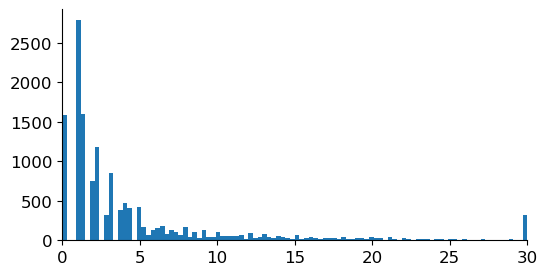

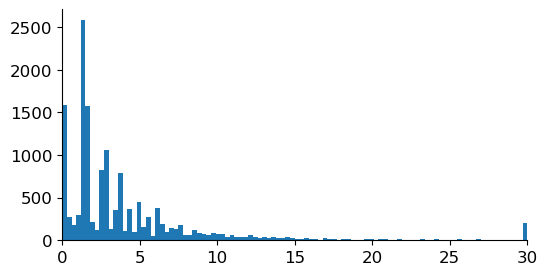

In [22]:
upper_clip = 30
plt.figure()
plt.hist(df.centroid_dist.fillna(0).clip(lower=0, upper=upper_clip), bins=100);
plt.xlim(0,upper_clip)

plt.figure()
plt.hist(df.ncentroid_dist.fillna(0).clip(lower=0, upper=upper_clip), bins=100);
plt.xlim(0,upper_clip)

344.1909068822861


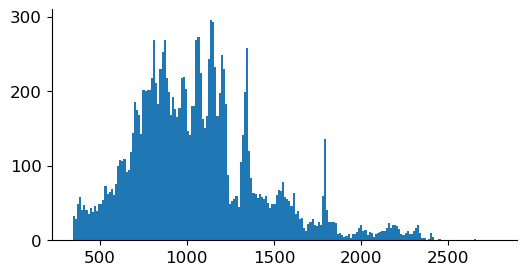

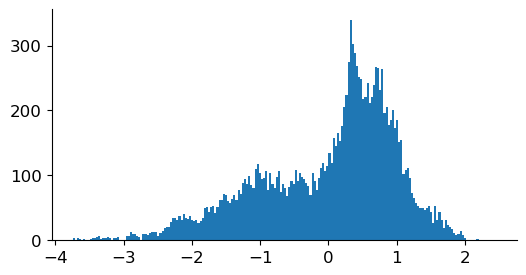

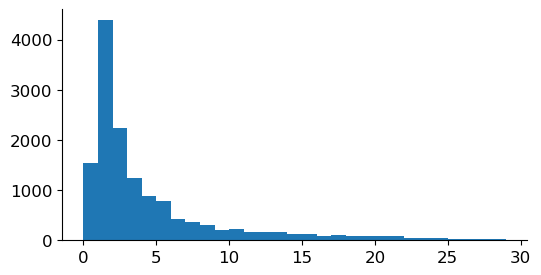

In [8]:
# still needs normalization ie mpp
# centroid distance can still include movements!
print(min(df.perimeter))
plt.figure()
plt.hist(df.perimeter, bins=200);

plt.figure()
plt.hist(df.peri_zscore, bins=200);

plt.figure()
plt.hist(df.centroid_dist, bins=np.arange(0,30,1));

/var/folders/l1/s9h8bddx0mv1bqzrqffsxhp00000gn/T/ipykernel_8136/843356480.py:7: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(smap, shrink=.5, boundaries=np.arange(df.exp.nunique()))
/var/folders/l1/s9h8bddx0mv1bqzrqffsxhp00000gn/T/ipykernel_8136/843356480.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(smap, shrink=.5, boundaries=np.arange(df.exp.nunique()))


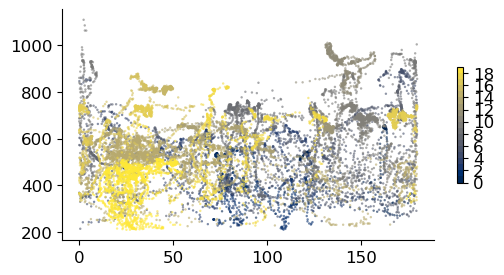

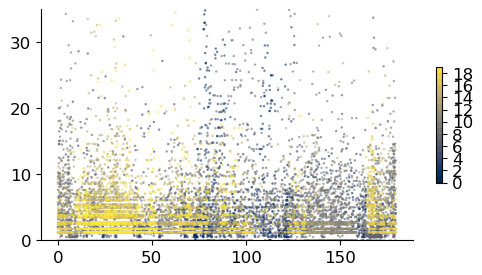

In [47]:
from utils.utils import create_scalarmappable
#c, smap = create_scalarmappable("coolwarm", df.perimeter.to_numpy())
c, smap = create_scalarmappable("cividis", df.exp.to_numpy())

fig, ax = plt.subplots()
ax.scatter(df.orientation, df.nperimeter, marker="o", s=3, c=c, alpha=.6, edgecolors="None")
plt.colorbar(smap, shrink=.5, boundaries=np.arange(df.exp.nunique()))

c, smap = create_scalarmappable("cividis", df.exp.to_numpy())
fig, ax = plt.subplots()
ax.scatter(df.orientation, df.ncentroid_dist, marker="o", s=3, c=c, alpha=.6, edgecolors="None")
ax.set(ylim=(0,35))
plt.colorbar(smap, shrink=.5, boundaries=np.arange(df.exp.nunique()))



/var/folders/l1/s9h8bddx0mv1bqzrqffsxhp00000gn/T/ipykernel_8136/1082292925.py:7: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(smap, shrink=.2)


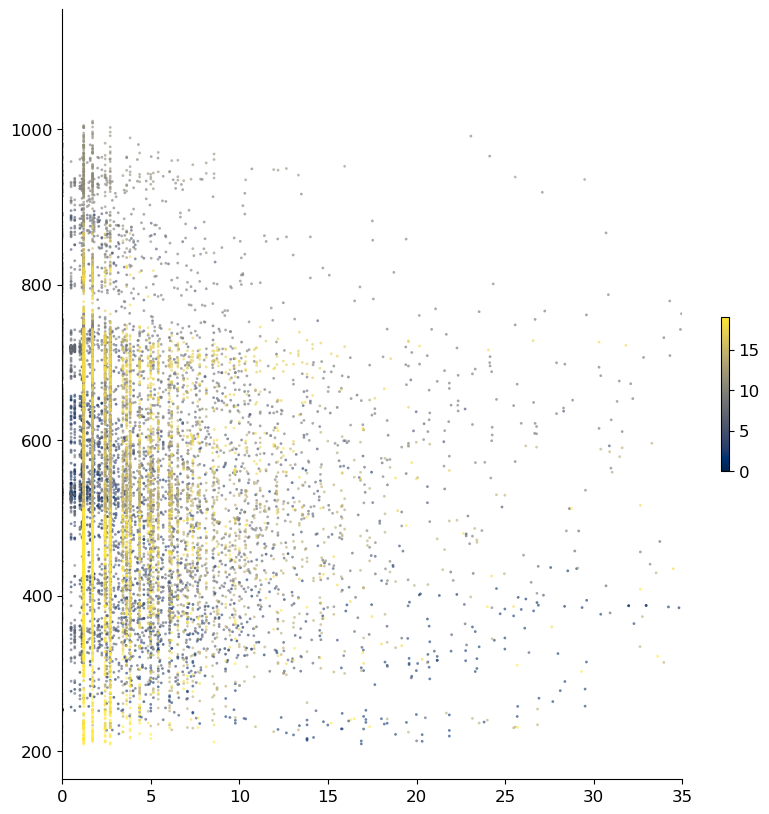

In [49]:
#c, smap = create_scalarmappable("coolwarm", df.nperimeter.to_numpy())
c, smap = create_scalarmappable("cividis", df.exp.to_numpy())

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df.ncentroid_dist, df.nperimeter, marker="o", s=4, c=c, alpha=.6, edgecolors="None")
ax.set(xlim=(0,35))
plt.colorbar(smap, shrink=.2)

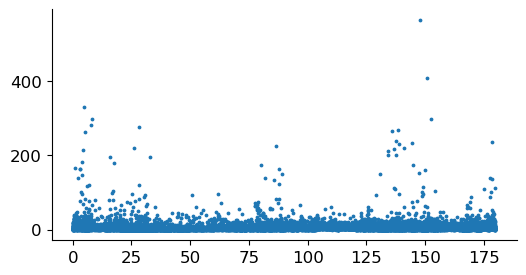

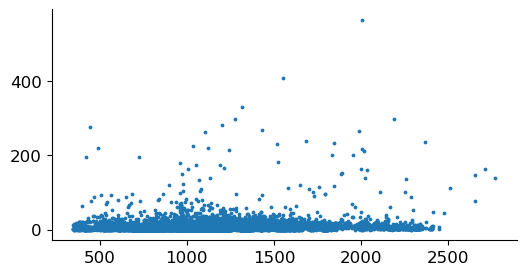

In [24]:
plt.figure()
plt.scatter(df.orientation, df.centroid_dist, marker="o", s=3)

plt.figure()
plt.scatter(df.perimeter, df.centroid_dist, marker="o", s=3)